# **Cheminformatics in Python [PART 2.2] Predicting Solubility of Molecules using PyCaret | End-to-End Data Science Project** 

Mr. Gulab Patel, IIT BHU, Varanasi



In this Jupyter notebook, we will continue our journey into the world of Cheminformatics (i.e. lies at the interface of Informatics and Chemistry) by simplifying this notebook via the use of the low-code machine learning library PyCaret.


**Information from the previous notebook:**

We will be reproducing a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

This idea for this notebook was inspired by the excellent blog post by Pat Walters$^2$ where he reproduced the linear regression model with similar degree of performance as that of Delaney. This example is also briefly described in the book ***Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More***.$^3$

## **1. Install PyCaret**

In [1]:
! pip install pycaret

     |████████████████████████████████| 256kB 5.7MB/s 
     |████████████████████████████████| 6.8MB 6.8MB/s 
     |████████████████████████████████| 174kB 40.8MB/s 
     |████████████████████████████████| 266kB 45.6MB/s 
     |████████████████████████████████| 148.9MB 44kB/s 
     |████████████████████████████████| 1.8MB 39.9MB/s 
     |████████████████████████████████| 1.6MB 37.5MB/s 
     |████████████████████████████████| 276kB 44.4MB/s 
     |████████████████████████████████| 66.3MB 65kB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 13.9MB 39.4MB/s 
     |████████████████████████████████| 604kB 33.1MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 3.1MB 40.1MB/s 
     |████████████████████████████████| 2.1MB 46.4MB/s 
     |████████████████████████████████| 1.1MB 39.7MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 


## **2. Read in dataset**

In [2]:
import pandas as pd

In [3]:
delaney_with_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)

In [4]:
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **3. Model Building**

### **3.1. Model Setup**

In [5]:
from pycaret.regression import *

In [6]:
model = setup(data = dataset, target = 'logS', train_size=0.8, silent=True)

,Description,Value
0,session_id,6184
1,Target,logS
2,Original Data,"(1144, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 4)"


### **3.2. Model comparison**

Subsequent blocks of codes here will be using the ``training set`` (the 80% subset) for model building.

In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.5391,0.5407,0.7265,0.8830,0.2042,0.6319,0.968
et,Extra Trees Regressor,0.5245,0.5416,0.7264,0.8829,0.2004,0.6865,0.441
lightgbm,Light Gradient Boosting Machine,0.5479,0.5617,0.7380,0.8790,0.2110,0.7160,0.061
rf,Random Forest Regressor,0.5385,0.5614,0.7379,0.8789,0.2022,0.6876,0.511
gbr,Gradient Boosting Regressor,0.5782,0.5776,0.7519,0.8746,0.2184,0.7212,0.087
xgboost,Extreme Gradient Boosting,0.5574,0.6144,0.7754,0.8668,0.2130,0.7046,0.426
ada,AdaBoost Regressor,0.6988,0.8138,0.8967,0.8221,0.2446,0.7616,0.080
dt,Decision Tree Regressor,0.6657,0.8811,0.9301,0.8080,0.2519,0.8527,0.015
br,Bayesian Ridge,0.7674,0.9908,0.9868,0.7839,0.2806,0.9097,0.016
ridge,Ridge Regression,0.7670,0.9909,0.9869,0.7839,0.2808,0.9088,0.013


### **3.3. Model Creation**

In [8]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4098,0.3086,0.5555,0.9149,0.1636,0.2345
1,0.5600,0.6452,0.8032,0.8559,0.2183,0.4162
2,0.5676,0.6299,0.7937,0.8731,0.2043,0.4682
3,0.5321,0.4774,0.6909,0.8877,0.2255,0.5377
4,0.7225,1.0029,1.0015,0.8323,0.2615,2.9298
5,0.5218,0.5076,0.7125,0.8688,0.1670,0.2504
6,0.5238,0.5411,0.7356,0.8790,0.2103,0.2686
7,0.4637,0.3772,0.6142,0.9162,0.1506,0.2064
8,0.4680,0.3969,0.6300,0.9154,0.1777,0.3843
9,0.4756,0.5290,0.7273,0.8856,0.2248,1.1688


### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [13]:
tuned_et = tune_model(et, n_iter = 10, optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6982,0.7856,0.8864,0.7833,0.2457,0.4768
1,0.7888,1.0043,1.0021,0.7757,0.2879,0.9476
2,0.8516,1.2182,1.1037,0.7545,0.2692,0.7315
3,0.8524,1.0836,1.0409,0.7450,0.3060,1.5047
4,0.9534,1.5506,1.2452,0.7407,0.3197,3.4003
5,0.7344,0.9210,0.9597,0.7620,0.2375,0.4980
6,0.7966,1.0229,1.0114,0.7713,0.2411,0.4521
7,0.8165,1.0557,1.0274,0.7655,0.2581,0.4614
8,0.7942,0.9261,0.9624,0.8026,0.2551,0.6896
9,0.7892,0.9815,0.9907,0.7878,0.2729,3.1497


In [14]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=8,
                    max_features='log2', max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.0002, min_impurity_split=None,
                    min_samples_leaf=3, min_samples_split=10,
                    min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                    oob_score=False, random_state=6184, verbose=0,
                    warm_start=False)


### **4. Model Analysis**

#### **4.1. Plot Models**
For more details visit https://pycaret.org/plot-model/.

**Residuals Plot**

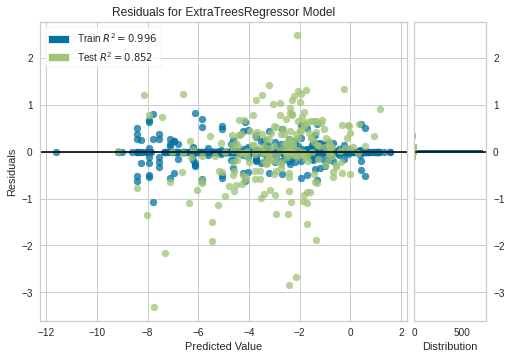

In [15]:
plot_model(et, 'residuals')

**Prediction Error Plot**

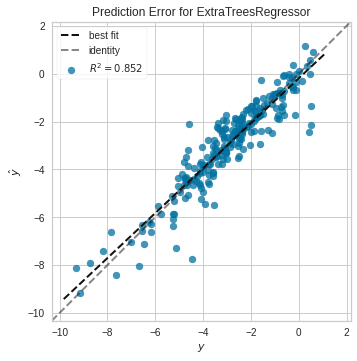

In [16]:
plot_model(et, 'error')

**Cooks Distance Plot**

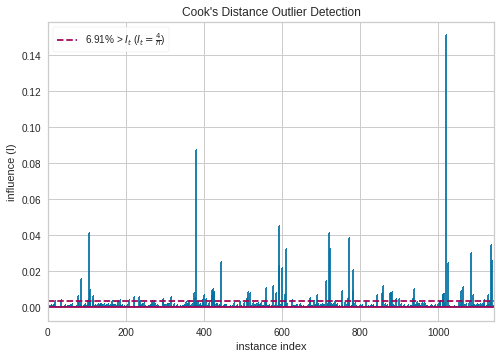

In [17]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

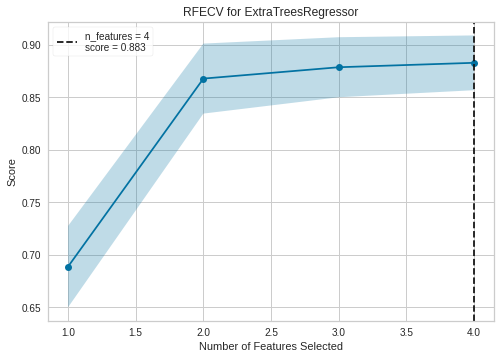

In [18]:
plot_model(et, 'rfe')

**Learning Curve**

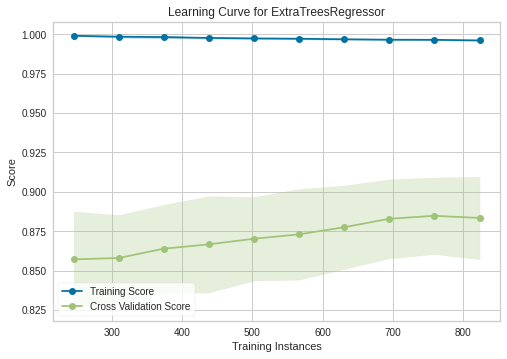

In [19]:
plot_model(et, 'learning')

**Validation Curve**

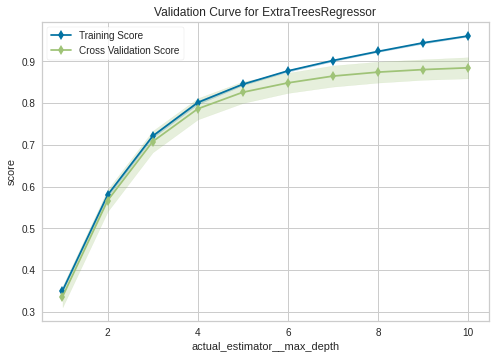

In [20]:
plot_model(et, 'vc')

**Manifold Learning**

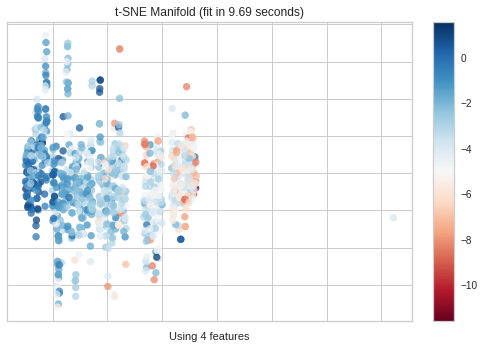

In [21]:
plot_model(et, 'manifold')

**Feature Importance**

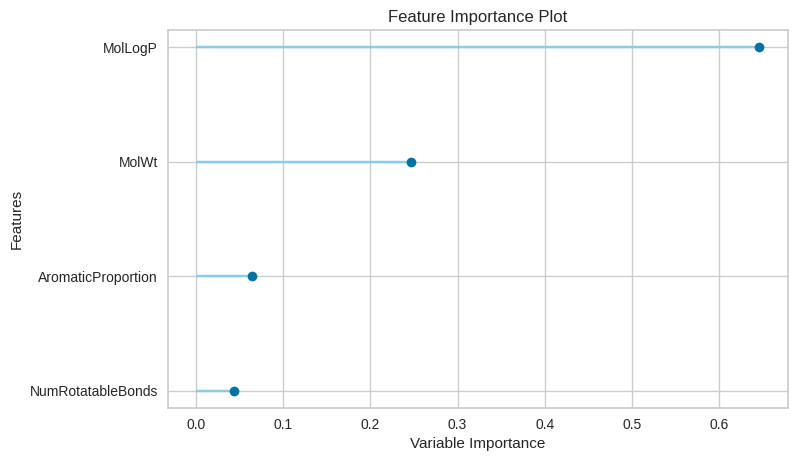

In [22]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [23]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


Here, the hyperparameter of the tuned model is displayed below.

In [24]:
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,8
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0002
min_impurity_split,None
min_samples_leaf,3


**Show all plots**

The ``evaluate_model()`` displays all available plots here.

In [25]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### **4.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

In [27]:
!pip install shap

     |████████████████████████████████| 327kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463903 sha256=3d55facc05c708ae171b9d1f50b88cfb0f90a2371637979b28d18866208efb32
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


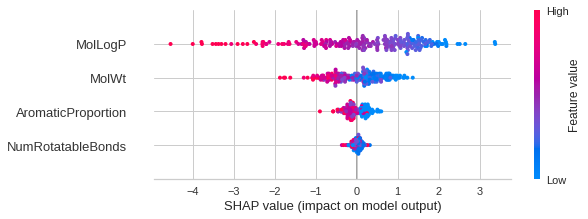

In [28]:
interpret_model(et)

**Correlation Plot**

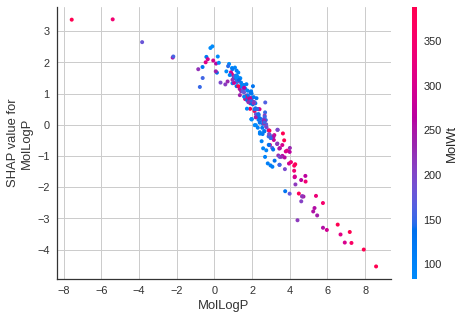

In [29]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [30]:
interpret_model(et, plot = 'reason', observation = 10)

### **6.6. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [31]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.503,0.5189,0.7204,0.8519,0.2104,0.3994


In [32]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,2.95020,322.243011,5.0,0.272727,-3.561,-5.47000
1,1.57722,107.155998,0.0,0.750000,-0.850,-1.71000
2,1.55740,102.177002,3.0,0.000000,-0.890,-0.80000
3,1.84434,279.335999,5.0,0.300000,-1.601,-2.92177
4,2.39500,299.691010,8.0,0.000000,0.523,-2.14900


---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Scott M. Lundberg and Su-In Lee. [A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions), A Unified Approach to Interpreting Model Predictions, ***Advances in Neural Information Processing Systems 30 (NIPS 2017)***, 2017.